# План семинара
- Функционалы и метрики
- Кросс-валидация
- Переобучение и регуляризация
- Гиперпараметры и их оптимизация

# Функционалы и метрики

Quick recap

Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример: Чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$

где $\hat y_{i} = \Sigma_{i=0}^{k}w_{k}X_{ik}$

А как метрику можем использовать RMSE

$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения в вышке: Чтобы сдать матан, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали матан будет являться оценка, полученная в конце курса.

Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes 

In [2]:
np.random.seed(42)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
a, b = 2, 3
a, b

(2, 3)

In [5]:
X, y = load_diabetes(return_X_y=True,as_frame=True)


In [8]:
X.sample(2, random_state = 42)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788


In [11]:
round(X.describe(), 3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


In [7]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [12]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Populating the interactive namespace from numpy and matplotlib


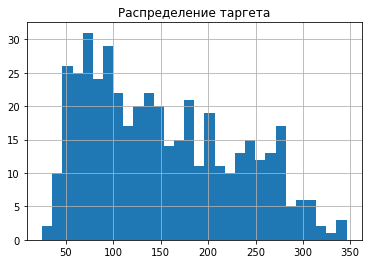

In [16]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y, bins = 30)
plt.title('Распределение таргета')
plt.grid()

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это 

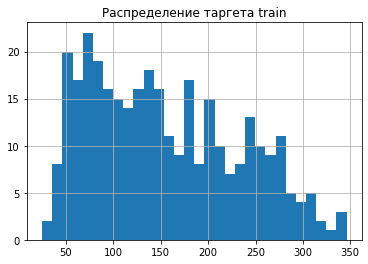

In [21]:
plt.hist(y_train, bins = 30)
plt.title('Распределение таргета train')
plt.grid()

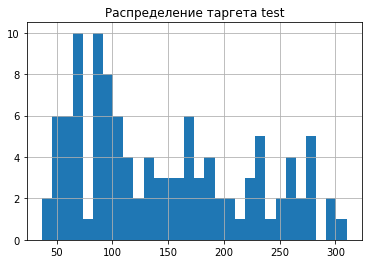

In [22]:
plt.hist(y_test, bins = 30)
plt.title('Распределение таргета test')
plt.grid()

In [23]:
len(y_test)/len(y), len(y_train)/len(y)

(0.251131221719457, 0.748868778280543)

In [24]:
X_test_mini = X_test.iloc[:2]

In [25]:
X_test_mini

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_mse = SGDRegressor(max_iter=50000) # MSE
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000) # MAE

lr_mse.fit(X_train, y_train)
lr_mae.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)
y_pred_mae = lr_mae.predict(X_test)

print(f'''MSE loss: 
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')





MSE loss: 
mae=41.71143145531391
mse=2811.3971376732493
R2=0.49158140141281137

MAE loss: 
mae=62.88158974548468
mse=5566.6446105480045
R2=-0.006682981142266842



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [31]:
a = [120, 130, 156, 183, 194, 201]

In [33]:
np.sum(a)/6

164.0

In [30]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 136.7995405018492
MAE Loss: 175.53165914194616


BTW, в sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

In [34]:
from sklearn.model_selection import cross_validate, cross_val_score

здесь можно посмотреть какие параметры требуются для этой функции
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [42]:
# проверим на кросс-валидации значения ошибок MSE, MAE, R2 
# для линейной регрессии, обученной с помощью функционала MSE

num_splits=5

cv_res = cross_validate(lr_mse,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits, # количество разбиений или класс-сплиттер
                     verbose = 4
                    )

print(f"test mse errors are {cv_res['test_score']}")
print(f"mean test mse = {cv_res['test_score'].mean()}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................................., score=-2963.640 total time=   0.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ..................................., score=-3033.844 total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END ..................................., score=-3158.571 total time=   0.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] END ..................................., score=-2896.725 total time=   0.6s
[CV] END ..................................., score=-3043.021 total time=   0.6s
test mse errors are [-2963.63959739 -3033.84389432 -3158.57098353 -2896.72459799
 -3043.02068914]
mean test mse = -3019.1599524713283


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


In [43]:
cv_res

{'fit_time': array([0.69854164, 0.6261425 , 0.70490479, 0.68985128, 0.65715718]),
 'score_time': array([0.00299454, 0.00298643, 0.00399184, 0.00617146, 0.        ]),
 'test_score': array([-2963.63959739, -3033.84389432, -3158.57098353, -2896.72459799,
        -3043.02068914])}

In [41]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [44]:
# Проведем кросс-валидацию сразу для нескольких метрик

cv_res2 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                     cv=num_splits
                    )
print(f"""test mse errors are {cv_res2['test_neg_mean_squared_error']} 
and  mean mse = {cv_res2['test_neg_mean_squared_error'].mean()}
""")

print(f"""test mae errors are {cv_res2['test_neg_mean_absolute_error']} 
and  mean mae = {cv_res2['test_neg_mean_absolute_error'].mean()}
""")


print(f"""test R2 are {cv_res2['test_r2']} 
and  mean R2 = {cv_res2['test_r2'].mean()}
""")


test mse errors are [-2963.86190214 -3035.29902583 -3166.20968795 -2909.53584172
 -3018.34956138] 
and  mean mse = -3018.6512038037304

test mae errors are [-44.85560603 -44.95532689 -48.09808987 -42.70072692 -43.68923774] 
and  mean mae = -44.85979748885796

test R2 are [0.39181175 0.52158075 0.49410132 0.44540847 0.53353659] 
and  mean R2 = 0.47728777468498834



In [46]:
pd.DataFrame(cv_res2)

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_r2
0,0.647300,0.000000,-2963.861902,-44.855606,0.391812
1,0.592296,0.018439,-3035.299026,-44.955327,0.521581
2,0.608288,0.015670,-3166.209688,-48.098090,0.494101
3,0.644776,0.003992,-2909.535842,-42.700727,0.445408
4,0.643302,0.003990,-3018.349561,-43.689238,0.533537


In [47]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

In [48]:
# для тех, кто хочет хочет дополнительно подумать

# кросс-валидацию можно проводить на основе своей кастомной метрики, но для этого
# из нее нужно сделать объект scorer

from sklearn.metrics import make_scorer

max_error_scorer = make_scorer(max_error, greater_is_better=False)

cv_res3 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=max_error_scorer,
                     cv=num_splits
                    )
cv_res3['test_score']

array([-137.49342897, -160.51860868, -120.84415748, -129.11069801,
       -135.03734357])

# Немного feature engineering

Один из самых главных источников улучшения качества прогноза модели - это информативный набор признаков. Поэтому в попытке улучшить качество нашей модели обогатим наше признаковое пространство попарныи произведениями признаков

In [49]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X[col_name] = X[col1]*X[col2]
X

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,...,-0.000672,-0.000894,-0.001089,-0.000386,0.000780,0.000614,0.000766,0.000046,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,...,0.000174,0.004116,0.004746,0.002428,0.000779,0.001767,-0.006861,0.003641,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,...,-0.002212,-0.001314,-0.001153,0.000147,0.001182,0.000887,0.000839,0.000067,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,...,0.000834,0.000418,0.000109,0.000343,-0.000114,-0.000234,0.000337,-0.000321,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,...,-0.000251,0.002082,0.001697,-0.001020,-0.000184,-0.000727,-0.000380,0.000121,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,0.000301,0.000365,0.000142,0.000431,-0.000041,-0.000018,-0.000207,-0.000019,0.000225,0.000052
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,...,-0.000245,0.002255,-0.000708,-0.003009,0.002195,0.003522,-0.001276,0.001526,-0.000806,0.001979
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,...,0.000646,0.000785,-0.000246,0.000268,-0.000578,-0.000214,-0.000387,-0.000172,-0.000726,0.000240
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,...,0.001179,0.001158,-0.001013,-0.000032,-0.000423,-0.000396,0.000744,-0.000689,-0.001155,0.000672


# Переобучение и регуляризация

Переобучение - ситуация, когда модель хорошо выучила обучающую выборку, но при этом показывает гораздо более низкое качество точности на тестовых данных. Это можно интерпретровать как модель стала слишком специфичной и потеряла обобщающую способность

В случае линеной регрессии, одним из симптомов переобучения являются высокие значения весов. С этим борются регуляризацией.

Регуляризация Lasso или L1-регуляризация:

$Q_{lasso}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}|w_{k}|$

Регуляризация Ridge или L2-регуляризация:

$Q_{ridge}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}w_{k}^{2}$


Как было рассказано в лекции, несмотря на то, что оба вида регуляризации ведут к занижению значений весов, отличие регуляризации Lasso заключается в том, что она может привести часть весов к 0 (что эквивалетно безинформативности  соответствующего признака), в случае Ridge регрессии веса могут быть сколько угодно близки к 0, но никогда не равны.

Объяснение в лекции :)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
lr_mse.fit(X_train, y_train)

pred = lr_mse.predict(X_test)

mean_squared_error(y_test, pred)

2359.5390522089415

In [52]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_tr = lasso.predict(X_train)
    y_pred2 = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(lasso.coef_,'\n')

alpha=1e-08
Train MSE: 2523.2309636109044
Test MSE: 2964.3878245470914
[ 3.42764714e+01  6.00290690e+01  4.20700907e+02  3.30262660e+02
 -1.96407260e+02  7.15142803e+01 -3.41970254e+02 -5.26949172e+01
  6.61126058e+02  1.34437615e+02  1.43987820e+03  5.31103694e+03
  6.11136367e+02  1.84294792e+03  4.68209018e+02 -4.44829627e+03
 -1.13075714e+03  1.42627908e+03  1.12033936e+03  8.47522790e+02
 -9.43759576e+02 -5.76875482e+04  3.75728184e+02  2.30917968e+03
  2.18190433e+03 -4.41727309e+03  3.22496841e+03 -1.56019040e+03
  9.79006672e+02  1.07052551e+03 -1.32956018e+03  8.37013174e+02
  3.42140835e+02  4.16538694e+03 -3.86269312e+03 -2.20967526e+03
  6.98946401e+03 -1.34199500e+03  2.79344631e+03  2.19383780e+03
 -9.57642583e+02 -1.17895539e+02 -1.67986177e+02 -1.48109718e+03
 -6.95785783e+03  6.51742101e+03  4.68361216e+03  9.26812277e+01
  1.69038611e+03 -1.82319356e+03  2.39021533e+03  4.20223695e+03
 -1.74431691e+03 -7.62630483e+03 -3.61975804e+03 -1.59316645e+03
 -1.69030329e+04 -1

In [53]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       ...
       's6_x_age', 's6_x_sex', 's6_x_bmi', 's6_x_bp', 's6_x_s1', 's6_x_s2',
       's6_x_s3', 's6_x_s4', 's6_x_s5', 's6_x_s6'],
      dtype='object', length=110)

In [54]:
lasso

Lasso()

In [55]:
pd.DataFrame(zip(X.columns, lasso.coef_))

,0,1
0,age,0.000000
1,sex,-0.000000
2,bmi,271.931316
3,bp,0.000000
4,s1,0.000000
...,...,...
105,s6_x_s2,0.000000
106,s6_x_s3,-0.000000
107,s6_x_s4,0.000000
108,s6_x_s5,0.000000


In [30]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_tr = ridge.predict(X_train)
    y_pred2 = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(ridge.coef_,'\n')

alpha=1e-08
Train MSE: 2377.74003873452
Test MSE: 3966.916740304038
[ 1.33826953e+02 -3.45589558e+02  3.58187558e+02  3.99780740e+02
 -8.18753939e+03  7.18046182e+03  2.50604361e+03 -1.06876839e+02
  3.18096722e+03  9.24627695e+01  1.55792120e+03  1.18089442e+03
 -6.86418896e+02  1.92081210e+03 -5.46800277e+03 -2.94771666e-02
  5.48794193e+03  5.59146045e+03  1.33161991e+03  5.31258628e+02
  1.18089442e+03 -2.08683633e+00 -1.49917504e+03  4.14693304e+02
  7.44984331e+03 -4.34274038e+03 -4.56396404e+03 -4.90918738e+03
 -4.13189444e+02  6.97673460e+02 -6.86418896e+02 -1.49917504e+03
 -4.65764124e+01  1.30117297e+03 -9.22179375e+03  7.89455956e+03
  4.66572662e+03  1.10510086e+03  4.53759469e+03 -8.89748737e+01
  1.92081210e+03  4.14693303e+02  1.30117297e+03  1.01534699e+03
  9.05904072e+03 -6.94777176e+03 -5.00134377e+03 -6.88714490e+02
 -4.06838228e+03 -1.02636022e+03 -5.46800277e+03  7.44984331e+03
 -9.22179375e+03  9.05904073e+03  9.20658332e+04 -6.29038107e+04
 -5.56467133e+04 -2.62

А какой коэффициент альфа лучший ? И нужна ли здесь регуляризация ?

Чтобы ответить на этот вопрос мы можем с помощью кросс-валидации перебрать различные значения альфы и выбрать лучшее значение. Этот процесс называется оптимизацией гиперпараметров. Альфа является гиперпараметром, потому что задача оптимизации функционала не позволяет найти ее оптимальное значение (в отличие от весов регрессии).

In [31]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(1e-10, 5, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)

print(f'Optimal alpha value is {lasso_cv.alpha_}')


Optimal alpha value is 0.025125628240201005


In [32]:
# Более общий способ использования кросс-валидации для поиска лучшего набора гиперпараметров


from sklearn.model_selection import GridSearchCV

params = {'alpha':alphas,}

#print(params)
cv = GridSearchCV(lasso,
                  params,
                  scoring='r2',
                  cv=num_splits
                 )
cv.fit(X, y)

print(cv.best_params_)

{'alpha': 0.025125628240201005}


In [33]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042748,0.002577,0.002322,0.002720,0.0,{'alpha': 1e-10},0.374011,0.532243,0.447966,0.088060,0.476719,0.383800,0.156425,32
1,0.005741,0.002474,0.004014,0.002079,0.025126,{'alpha': 0.025125628240201005},0.420838,0.520400,0.492165,0.432448,0.544555,0.482081,0.048347,1
2,0.009695,0.002058,0.004092,0.001650,0.050251,{'alpha': 0.05025125638040201},0.414919,0.519239,0.491511,0.441288,0.543241,0.482040,0.047718,2
3,0.008552,0.004244,0.007967,0.004077,0.075377,{'alpha': 0.07537688452060301},0.408844,0.517860,0.490503,0.447690,0.541514,0.481282,0.047805,3
4,0.007882,0.001209,0.006866,0.002173,0.100503,{'alpha': 0.10050251266080401},0.401952,0.515022,0.488770,0.452689,0.538919,0.479470,0.048189,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.003717,0.004344,0.012383,0.003991,4.899497,{'alpha': 4.899497487439196},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
196,0.008084,0.002016,0.007163,0.002258,4.924623,{'alpha': 4.924623115579397},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
197,0.007707,0.004620,0.004407,0.002524,4.949749,{'alpha': 4.9497487437195975},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
198,0.005005,0.003930,0.008612,0.005238,4.974874,{'alpha': 4.974874371859799},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93


Больше про то, как задавать поле поиска и какие еще есть методы оптимизации гиперпараметров можете прочитать здесь

https://scikit-learn.org/stable/modules/grid_search.html